In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader

from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.datasets.last_week_last_week import LWLWDataset
from hnmchallenge.datasets.last_month_last_week_dataset import LMLWDataset
from hnmchallenge.datasets.last_month_last_day import LMLDDataset
from hnmchallenge.models.itemknn.itemknn import ItemKNN


/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = LMLDDataset()
dr = DataReader()

In [3]:
base_load_path = dataset._DATASET_PATH / "xgb_models"

In [4]:
VERSION = 0
DATASET = f"dataset_v102_{VERSION}.feather"
MODEL_NAME = f"xgb_{DATASET}.json"

In [5]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [6]:
from xgboost import plot_importance

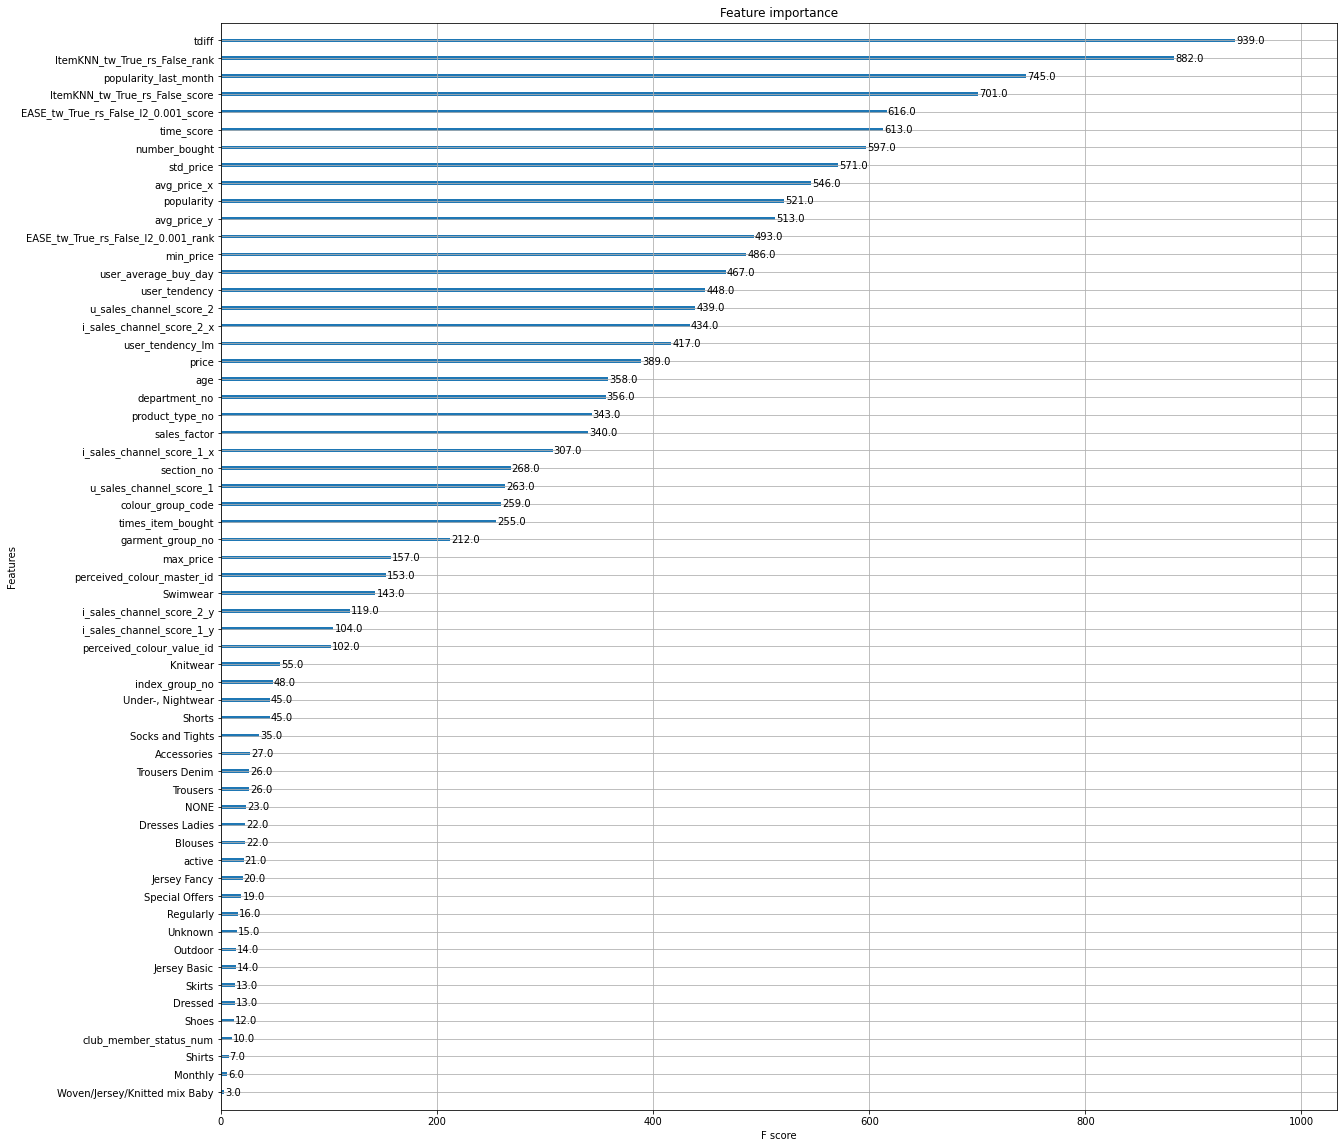

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [8]:
model.best_ntree_limit

226

In [9]:
features = pd.read_feather(dataset._DATASET_PATH / f"dataset_dfs/full/{DATASET}")

# Remember to use the bert_ntree_limit when taking the predictions

In [10]:
features.head()

,customer_id,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,EASE_tw_True_rs_False_l2_0.001_score,EASE_tw_True_rs_False_l2_0.001_rank,article_id,colour_group_code,i_sales_channel_score_2_x,i_sales_channel_score_1_x,department_no,...,Regularly,avg_price_y,user_tendency,user_tendency_lm,user_average_buy_day,u_sales_channel_score_2,u_sales_channel_score_1,time_score,tdiff,times_item_bought
0,0,0.008213,1.0,0.001712,2.0,1871.0,71,0.835887,0.164113,1747,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.0,0.004855,1.0
1,0,0.000439,73.0,NaN,NaN,146.0,9,0.776872,0.223128,1722,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
2,0,0.000439,72.0,NaN,NaN,10539.0,7,0.988842,0.011158,1772,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
3,0,0.000440,71.0,NaN,NaN,2774.0,71,0.972575,0.027425,1747,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
4,0,0.000442,70.0,NaN,NaN,389.0,9,0.984848,0.015152,1522,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN


In [11]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [26]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,1871.0,3.498216
1,0,146.0,-2.760733
2,0,10539.0,-2.717145
3,0,2774.0,-1.175032
4,0,389.0,-3.142280
...,...,...,...
137197995,1371979,68.0,-1.055777
137197996,1371979,467.0,-3.338247
137197997,1371979,397.0,-1.286314
137197998,1371979,3523.0,-2.562262


In [12]:
X.head()

,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,EASE_tw_True_rs_False_l2_0.001_score,EASE_tw_True_rs_False_l2_0.001_rank,colour_group_code,i_sales_channel_score_2_x,i_sales_channel_score_1_x,department_no,Accessories,Blouses,...,Regularly,avg_price_y,user_tendency,user_tendency_lm,user_average_buy_day,u_sales_channel_score_2,u_sales_channel_score_1,time_score,tdiff,times_item_bought
0,0.008213,1.0,0.001712,2.0,71,0.835887,0.164113,1747,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.0,0.004855,1.0
1,0.000439,73.0,NaN,NaN,9,0.776872,0.223128,1722,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
2,0.000439,72.0,NaN,NaN,7,0.988842,0.011158,1772,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
3,0.000440,71.0,NaN,NaN,71,0.972575,0.027425,1747,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
4,0.000442,70.0,NaN,NaN,9,0.984848,0.015152,1522,0,1,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN


In [30]:
features.head()

,customer_id,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,EASE_tw_True_rs_False_l2_0.001_score,EASE_tw_True_rs_False_l2_0.001_rank,article_id,colour_group_code,i_sales_channel_score_2_x,i_sales_channel_score_1_x,department_no,...,Regularly,avg_price_y,user_tendency,user_tendency_lm,user_average_buy_day,u_sales_channel_score_2,u_sales_channel_score_1,time_score,tdiff,times_item_bought
0,0,0.008213,1.0,0.001712,2.0,1871.0,71,0.835887,0.164113,1747,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.0,0.004855,1.0
1,0,0.000439,73.0,NaN,NaN,146.0,9,0.776872,0.223128,1722,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
2,0,0.000439,72.0,NaN,NaN,10539.0,7,0.988842,0.011158,1772,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
3,0,0.000440,71.0,NaN,NaN,2774.0,71,0.972575,0.027425,1747,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN
4,0,0.000442,70.0,NaN,NaN,389.0,9,0.984848,0.015152,1522,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,NaN,NaN,NaN


In [31]:
temp =features[features[DEFAULT_USER_COL]==0]
temp_c = temp[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
temp_f = temp.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)
pred_0 = model.predict(temp_f, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [33]:
temp_c["pred"]=pred_0

In [37]:
temp_c.sort_values("pred", ascending=False)

,customer_id,article_id,pred
72,0,2067.0,3.537214
0,0,1871.0,3.498216
71,0,2257.0,3.181571
85,0,4275.0,2.215381
59,0,197.0,2.167084
...,...,...,...
24,0,280.0,-3.862273
39,0,467.0,-3.933086
34,0,3029.0,-4.326122
23,0,83.0,-4.354214


In [13]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [14]:
customer_article_df["predicted_score"] = y_pred

In [15]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,1871.0,3.498216
1,0,146.0,-2.760733
2,0,10539.0,-2.717145
3,0,2774.0,-1.175032
4,0,389.0,-3.142280
...,...,...,...
137197995,1371979,68.0,-1.055777
137197996,1371979,467.0,-3.338247
137197997,1371979,397.0,-1.286314
137197998,1371979,3523.0,-2.562262


In [16]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=[True, False])

In [39]:
sorted_scores.head(20)

,customer_id,article_id,predicted_score
72,0,2067.0,3.537214
0,0,1871.0,3.498216
71,0,2257.0,3.181571
85,0,4275.0,2.215381
59,0,197.0,2.167084
76,0,1880.0,2.127306
49,0,4463.0,2.087152
54,0,141.0,2.040362
63,0,1971.0,1.961736
56,0,363.0,1.882688


In [18]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [19]:
cutoff = sorted_scores_index.groupby(DEFAULT_USER_COL).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+12))
    i=i+cut

In [20]:
cutoff.mean()

100.0

In [21]:
filter_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1200,
 1201,
 1202,
 1203,
 1204,
 1205,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1300,
 1301,
 1302,
 1303,
 1304,
 1305,
 1306,
 

In [22]:
final_df = sorted_scores_index.loc[filter_indices]

In [23]:
final_df

,customer_id,article_id,predicted_score
0,0,2067.0,3.537214
1,0,1871.0,3.498216
2,0,2257.0,3.181571
3,0,4275.0,2.215381
4,0,197.0,2.167084
...,...,...,...
137197907,1371979,2114.0,-0.886310
137197908,1371979,365.0,-0.890195
137197909,1371979,291.0,-0.911121
137197910,1371979,2257.0,-0.952924


In [24]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [25]:
dataset.create_submission(final_final_df, sub_name="hybrid_left_lmld")